In [1]:
import geopandas as gpd
import pandas as pd
import folium
from datetime import datetime

/home/janos/Documents/ITU/II_semester/venv/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_6597/775931208.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/la

In [2]:
gdf = gpd.read_file("../data/data_all_gpd_v4.shp")
gdf.head()

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,en_st_desc,en_st_lat,en_st_lon,minutes,id,total_dist,waytypes_d,waytypes_s,geometry
0,2022-07-01 21:18:29.678000+00:00,2022-07-01 21:26:29.560000+00:00,479,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,ved rundkjøringen,59.912183,10.754434,7,5391,1502.2,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914..."
1,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,ved rundkjøringen,59.912183,10.754434,8,6044,1502.2,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914..."
2,2022-07-06 15:36:16.304000+00:00,2022-07-06 15:41:54.552000+00:00,338,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,ved rundkjøringen,59.912183,10.754434,5,31205,1502.2,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914..."
3,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,9,6045,2701.3,0 2 7;2 86 2;86 94 7;94 111 6;111 112 7;112 11...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946..."
4,2022-07-02 12:38:43.229000+00:00,2022-07-02 12:49:29.189000+00:00,645,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,10,7493,2701.3,0 2 7;2 86 2;86 94 7;94 111 6;111 112 7;112 11...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946..."


In [3]:
len(gdf)

114925

In [4]:
def format_waytypes_summary(waytypes_summary):
    output_list = []
    data = waytypes_summary.split(";")
    data = list(filter(None, data))
    for sequence in data:
        datapoints = sequence.split(" ")
        output_list.append(
            {
                "value": datapoints[0].split(":")[1],
                "distance": datapoints[1].split(":")[1],
                "amount": datapoints[2].split(":")[1]
            }
        )
    return output_list

In [5]:
all_road = []
types = []

for i in range(len(gdf)):
    sample_route = gdf.iloc[i]
    waytypes_data = sample_route["waytypes_d"]
    waytypes_summary = sample_route["waytypes_s"]
    waytypes_summary_formatted = format_waytypes_summary(waytypes_summary)
    all_road.append(waytypes_summary_formatted)


In [6]:
value_map = {'0.0': 'Unkown', '1.0': 'State road', '2.0': 'Road', '3.0': 'Street','4.0': 'Path', '5.0': 'Track', '6.0': 'Bike', '7.0': 'Footway', '8.0': 'Steps', '9.0': 'Ferry', '10.0': 'Construction'}

In [7]:
for lst in all_road:
    for d in lst:
        value = d['value']
        if value in value_map:
            d['value'] = value_map[value]

In [8]:
distances_by_value = {}

for lst in all_road:
    for d in lst:
        value = d['value']
        distance = float(d['distance'])
        if value not in distances_by_value:
            distances_by_value[value] = distance
        else:
            distances_by_value[value] += distance

print(distances_by_value)

{'Street': 54527650.50000032, 'Road': 124851630.50000317, 'Footway': 18510586.50000065, 'Bike': 32995626.499998476, 'State road': 35428819.900001064, 'Path': 573431.9000000037, 'Steps': 29183.60000000017, 'Unkown': 38507.60000000034}


# Proportion of bike lanes

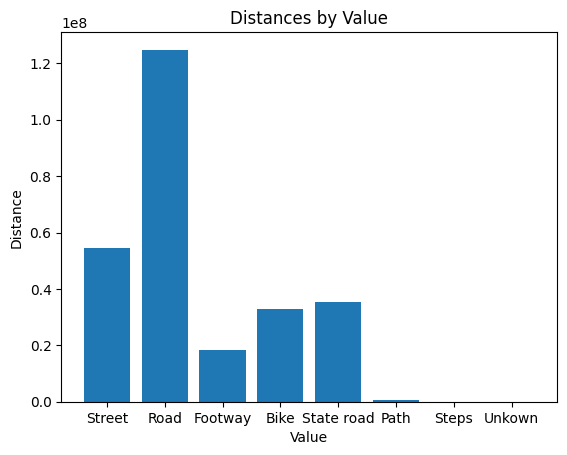

In [9]:
import matplotlib.pyplot as plt
plt.bar(distances_by_value.keys(), distances_by_value.values())
plt.xlabel('Value')
plt.ylabel('Distance')
plt.title('Distances by Value')
plt.show()

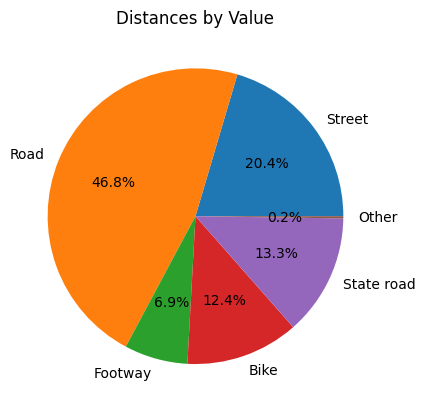

In [10]:
threshold = 0.05 
total = sum(distances_by_value.values())
small_values = {k: v for k, v in distances_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in distances_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distances by Value')
plt.show()

In [11]:
amounts_by_value = {}

for lst in all_road:
    for d in lst:
        value = d['value']
        amount = float(d['amount'])
        if value not in amounts_by_value:
            amounts_by_value[value] = amount
        else:
            amounts_by_value[value] += amount

print(amounts_by_value) 

{'Street': 2494812.1200000104, 'Road': 5498031.370000124, 'Footway': 955527.4000000393, 'Bike': 1129965.8799999813, 'State road': 1382671.480000008, 'Path': 27472.09999999988, 'Steps': 1857.490000000018, 'Unkown': 2162.2000000000107}


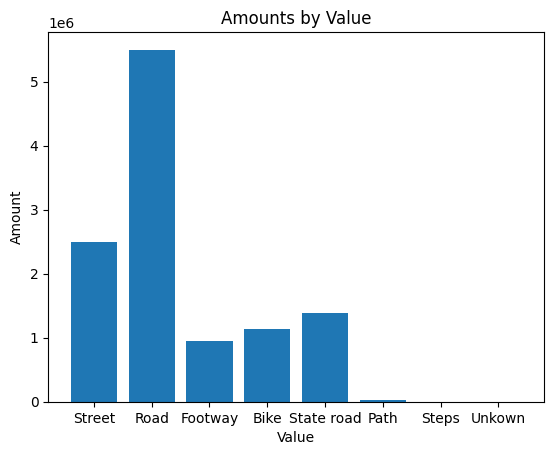

In [12]:
import matplotlib.pyplot as plt
plt.bar(amounts_by_value.keys(), amounts_by_value.values())
plt.xlabel('Value')
plt.ylabel('Amount')
plt.title('Amounts by Value')
plt.show()

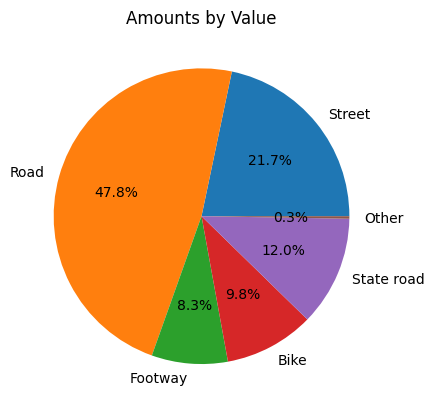

In [13]:
threshold = 0.05
total = sum(amounts_by_value.values())
small_values = {k: v for k, v in amounts_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in amounts_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Amounts by Value')
plt.show()


In [14]:
nbr_of_bike_lanes = 0
nbr_of_any_type_of_roads = 0 

for lst in all_road:
    for d in lst:
        nbr_of_any_type_of_roads += 1
        value = d['value']
        amount = float(d['amount'])
        if value == 'Bike':
            nbr_of_bike_lanes += 1

In [15]:
nbr_of_bike_lanes/nbr_of_any_type_of_roads

0.15306506942553771

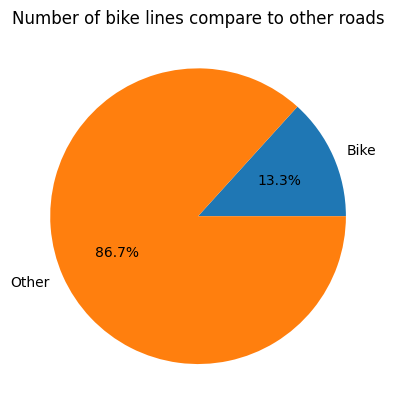

In [16]:
values = [nbr_of_bike_lanes, nbr_of_any_type_of_roads]
labels = ['Bike', 'Other']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Number of bike lines compare to other roads')
plt.show()

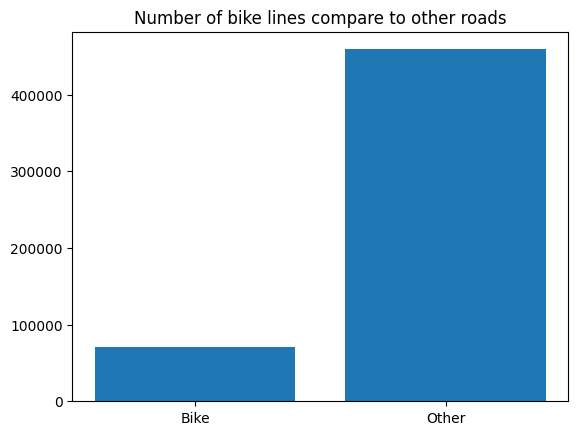

In [17]:
plt.bar(labels, values)
plt.title('Number of bike lines compare to other roads')
plt.show()

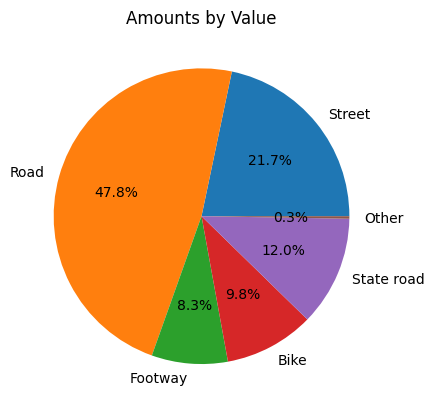

In [18]:
threshold = 0.05
total = sum(amounts_by_value.values())
small_values = {k: v for k, v in amounts_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in amounts_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Amounts by Value')
plt.show()


In [19]:
gdf.minutes

0          7
1          8
2          5
3          9
4         10
          ..
114920    15
114921    17
114922    13
114923     7
114924     8
Name: minutes, Length: 114925, dtype: int64

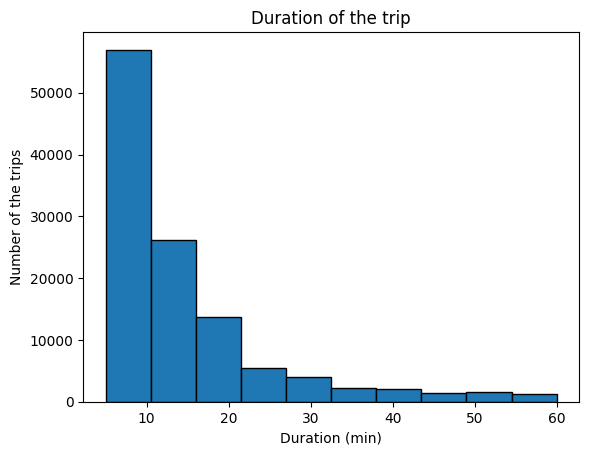

In [20]:
plt.hist(gdf.minutes, bins=10, edgecolor='black')

plt.xlabel('Duration (min)')
plt.ylabel('Number of the trips')
plt.title('Duration of the trip')

plt.show()

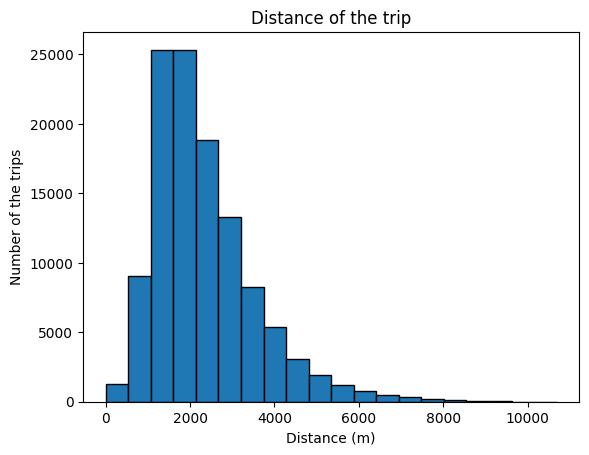

In [21]:
plt.hist(gdf.total_dist, bins=20, edgecolor='black')

plt.xlabel('Distance (m)')
plt.ylabel('Number of the trips')
plt.title('Distance of the trip')

plt.show()

In [22]:
gdf['km'] = gdf['total_dist']/1000
gdf['hour'] = gdf['minutes']/60
gdf['average speed'] = gdf['km'] / gdf['hour']

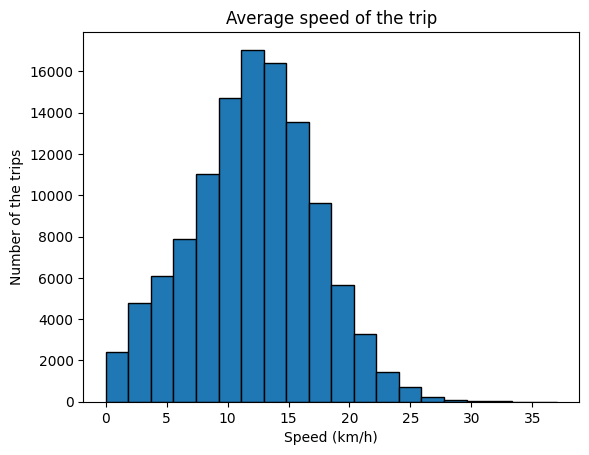

In [23]:
plt.hist(gdf['average speed'], bins=20, edgecolor='black')

plt.xlabel('Speed (km/h)')
plt.ylabel('Number of the trips')
plt.title('Average speed of the trip')

plt.show()

# Timely distributions

In [24]:
type(gdf.started_at[0])
date_string = gdf.started_at[0]
date_time_obj = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f%z')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())

Date: 2022-07-01
Time: 21:18:29.678000


In [25]:
gdf['date_time'] = pd.to_datetime(gdf['started_at'], format='%Y-%m-%d %H:%M:%S.%f%z')
gdf['date_time'] = pd.to_datetime(gdf.date_time).dt.tz_localize(None)
gdf['day_name'] = gdf['date_time'].dt.day_name()
gdf['date_column'] = gdf['date_time'].dt.strftime('%Y-%m-%d')
gdf['time_column'] = gdf['date_time'].dt.strftime('%H:%M:%S')
gdf['hour'] = gdf['date_time'].dt.strftime('%H')
gdf

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,...,waytypes_d,waytypes_s,geometry,km,hour,average speed,date_time,day_name,date_column,time_column
0,2022-07-01 21:18:29.678000+00:00,2022-07-01 21:26:29.560000+00:00,479,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,21,12.876000,2022-07-01 21:18:29.678,Friday,2022-07-01,21:18:29
1,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,08,11.266500,2022-07-02 08:39:02.618,Saturday,2022-07-02,08:39:02
2,2022-07-06 15:36:16.304000+00:00,2022-07-06 15:41:54.552000+00:00,338,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,15,18.026400,2022-07-06 15:36:16.304,Wednesday,2022-07-06,15:36:16
3,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,0 2 7;2 86 2;86 94 7;94 111 6;111 112 7;112 11...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,08,18.008667,2022-07-02 08:39:04.505,Saturday,2022-07-02,08:39:04
4,2022-07-02 12:38:43.229000+00:00,2022-07-02 12:49:29.189000+00:00,645,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,0 2 7;2 86 2;86 94 7;94 111 6;111 112 7;112 11...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,12,16.207800,2022-07-02 12:38:43.229,Saturday,2022-07-02,12:38:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114920,2022-07-05 06:09:41.903000+00:00,2022-07-05 06:25:30.553000+00:00,948,575,Sognsveien,ved Ullevål Stadion T-bane,59.947433,10.732570,739,Hammersborg Torg,...,0 2 7;2 63 2;63 69 6;69 186 2;186 202 3;202 20...,v:2.0 d:3743.7 a:90.85;v:3.0 d:301.3 a:7.31;v:...,"LINESTRING (10.73262 59.94744, 10.73257 59.947...",4.1206,06,16.482400,2022-07-05 06:09:41.903,Tuesday,2022-07-05,06:09:41
114921,2022-07-26 14:01:40.887000+00:00,2022-07-26 14:18:53.785000+00:00,1032,575,Sognsveien,ved Ullevål Stadion T-bane,59.947433,10.732570,739,Hammersborg Torg,...,0 2 7;2 63 2;63 69 6;69 186 2;186 202 3;202 20...,v:2.0 d:3743.7 a:90.85;v:3.0 d:301.3 a:7.31;v:...,"LINESTRING (10.73262 59.94744, 10.73257 59.947...",4.1206,14,14.543294,2022-07-26 14:01:40.887,Tuesday,2022-07-26,14:01:40
114922,2022-07-05 06:10:07.914000+00:00,2022-07-05 06:23:48.691000+00:00,820,624,Dælenenggata,ved Fagerheimgata,59.928750,10.767546,388,Skovveien,...,0 2 7;2 5 6;5 162 2;162 175 1;175 192 2;192 20...,v:2.0 d:3190.8 a:88.68;v:3.0 d:318.5 a:8.85;v:...,"LINESTRING (10.76749 59.92877, 10.76752 59.928...",3.5980,06,16.606154,2022-07-05 06:10:07.914,Tuesday,2022-07-05,06:10:07
114923,2022-07-05 06:10:56.512000+00:00,2022-07-05 06:18:35.020000+00:00,458,596,Idioten,langs Ullevålsveien,59.931020,10.736037,558,Dokkveien,...,0 1 7;1 2 2;2 4 6;4 24 3;24 58 2;58 86 1;86 13...,v:2.0 d:1469.3 a:51.23;v:3.0 d:898.1 a:31.32;v...,"LINESTRING (10.73603 59.93103, 10.73594 59.931...",2.8679,06,24.582000,2022-07-05 06:10:56.512,Tuesday,2022-07-05,06:10:56


## Date

In [26]:
type(gdf['time_column'])

pandas.core.series.Series

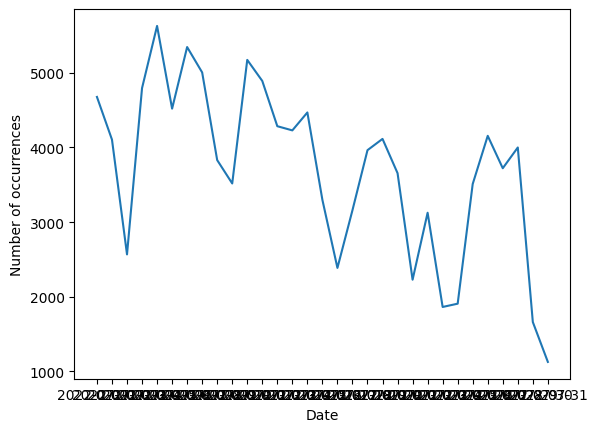

In [27]:
date_counts = gdf['date_column'].value_counts().sort_index()

plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of occurrences')
plt.show()

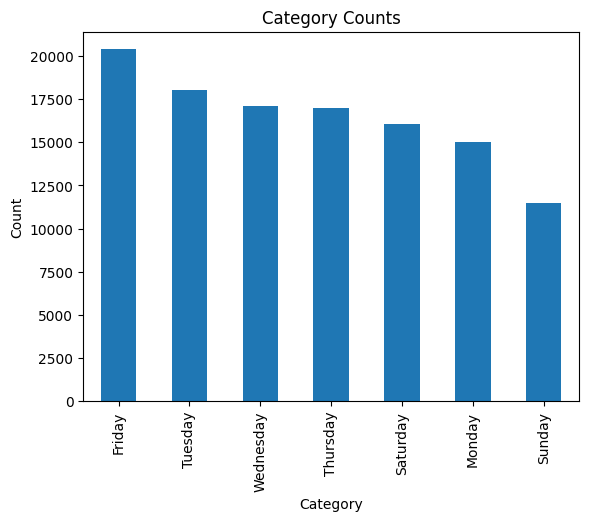

In [28]:
counts = gdf['day_name'].value_counts()
counts.plot(kind='bar')

# set the axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.show()

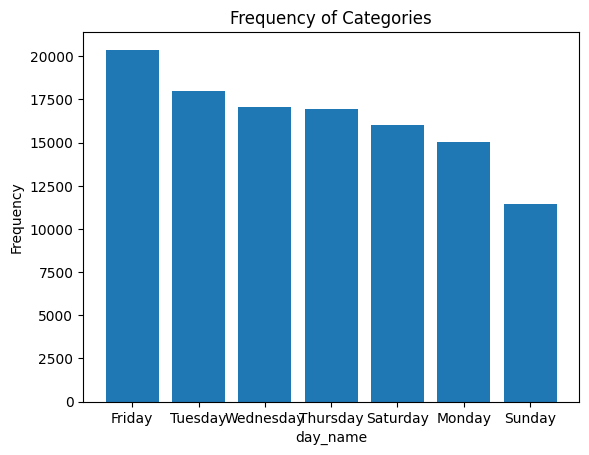

In [29]:
plt.bar(gdf['day_name'].value_counts().index, gdf['day_name'].value_counts().values)
plt.xlabel('day_name')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()

In [30]:
grouped = gdf.groupby('hour')
count_values = grouped['hour'].count()

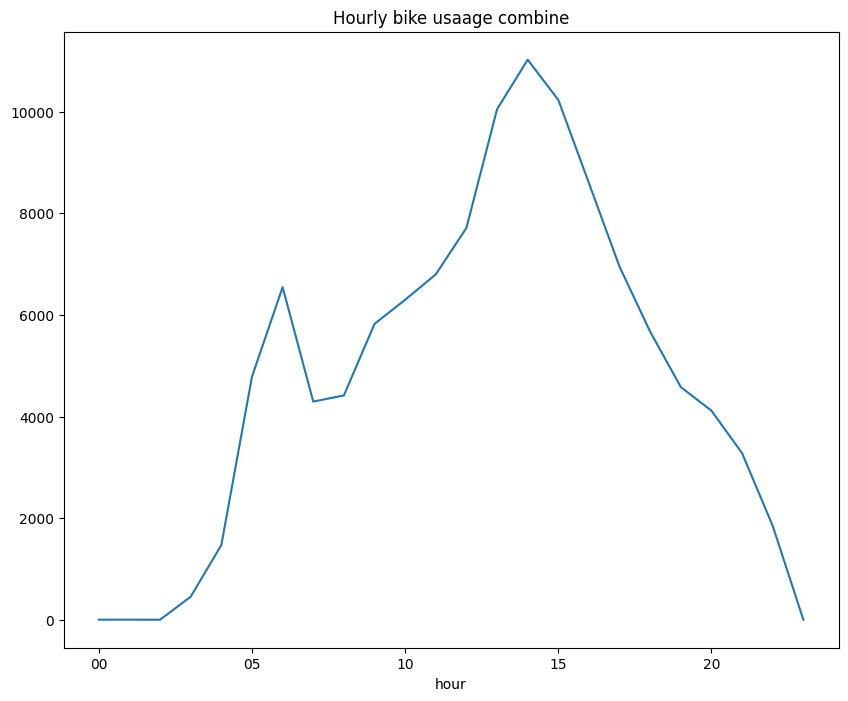

In [31]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike usaage combine')
plt.show()

In [32]:
def weekend(val):
    if val == 'Saturday' or val == 'Sunday':
        return 'weekend'
    else:
        return 'weekday'
gdf['type_of_day'] = gdf['day_name'].apply(weekend)
gdf.head()

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,...,waytypes_s,geometry,km,hour,average speed,date_time,day_name,date_column,time_column,type_of_day
0,2022-07-01 21:18:29.678000+00:00,2022-07-01 21:26:29.560000+00:00,479,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,21,12.876000,2022-07-01 21:18:29.678,Friday,2022-07-01,21:18:29,weekday
1,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,08,11.266500,2022-07-02 08:39:02.618,Saturday,2022-07-02,08:39:02,weekend
2,2022-07-06 15:36:16.304000+00:00,2022-07-06 15:41:54.552000+00:00,338,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,15,18.026400,2022-07-06 15:36:16.304,Wednesday,2022-07-06,15:36:16,weekday
3,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,08,18.008667,2022-07-02 08:39:04.505,Saturday,2022-07-02,08:39:04,weekend
4,2022-07-02 12:38:43.229000+00:00,2022-07-02 12:49:29.189000+00:00,645,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,12,16.207800,2022-07-02 12:38:43.229,Saturday,2022-07-02,12:38:43,weekend


In [33]:
weekend_gdf = gdf[gdf['type_of_day'] == 'weekend']
weekday_gdf = gdf[gdf['type_of_day'] == 'weekday']

In [34]:
grouped = weekday_gdf.groupby('hour')
count_values = grouped['hour'].count()

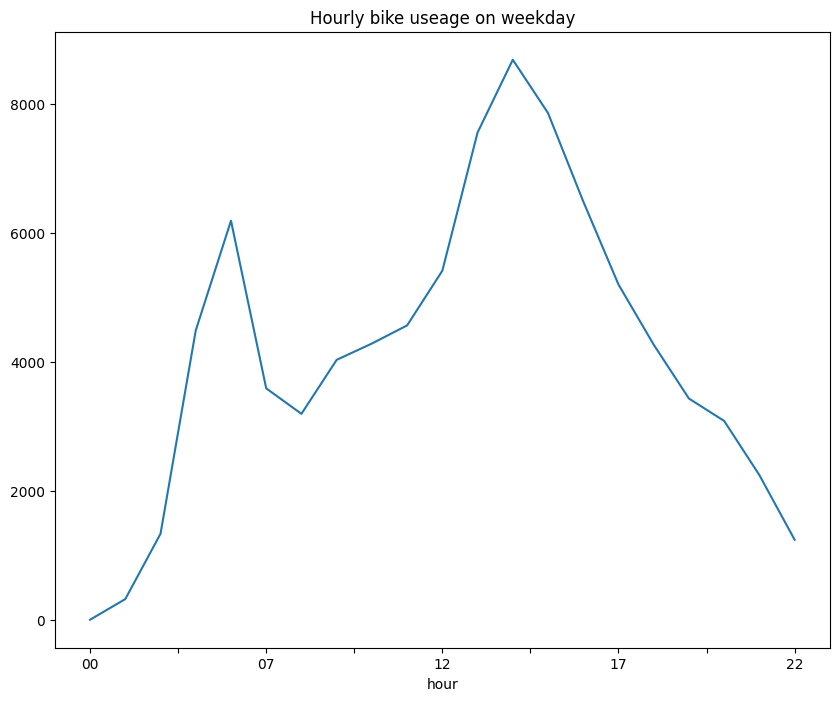

In [35]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike useage on weekday')
plt.show()

In [36]:
grouped = weekend_gdf.groupby('hour')
count_values = grouped['hour'].count()

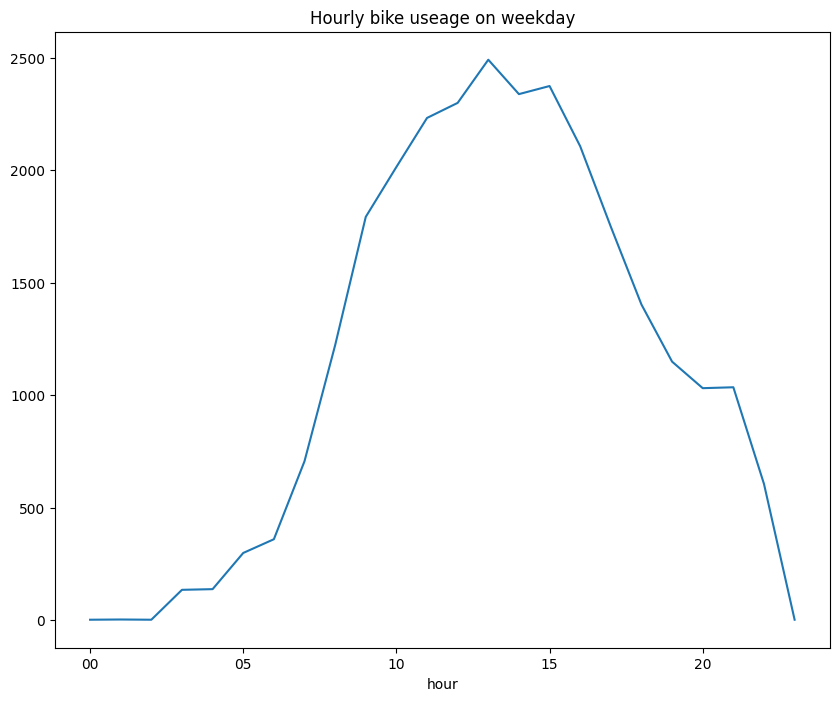

In [37]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike useage on weekday')
plt.show()